<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/a/a2/Colombia_Dane_logo_%282%29.svg', height="75">
<figcaption>Departamento Administrativo Nacional de Estadística - DANE<br> Dirección de Censos y Demografía - DCD<br>GIT Investigación y Desarrollo</figcaption></center>
</figure>

**Sesión 3 - Manipulación de datos con numpy - 19sep2025**

# 0. Declaración y exploración de arrays

Inicialmente se carga la librería numpy bajo el alias de *np*.

In [1]:
import numpy as np

Se instala y se carga la librería rasterio para revisar los datos de una capa de información espacial en formato ráster.

In [2]:
%%capture
!pip install rasterio

In [3]:
import rasterio as rs
from rasterio.plot import show

La característica principal de numpy es la clase de objeto array. Los arrays son similares a las listas en Python, excepto que cada elemento de un array debe ser del mismo tipo, generalmente un tipo numérico como float o int. Los arrays agilizan las operaciones con grandes cantidades de datos numéricos y, por lo general, son mucho más eficientes que las listas. Un array se puede crear a partir de una lista:

In [4]:
a = np.array([1, 4, 5, 8], float)
a

array([1., 4., 5., 8.])

In [5]:
type(a)

numpy.ndarray

## Otras formas de crear arrays

La función *arange* es similar a la función *range* pero devuelve una matriz en lugar de una lista:

In [6]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [7]:
np.arange(1, 16, 2, dtype=int)

array([ 1,  3,  5,  7,  9, 11, 13, 15])

Las funciones *zeros* y *ones* crean nuevos arrays de dimensiones específicas que contienen estos valores. Estas son quizás las funciones más utilizadas para crear nuevos arrays:

In [8]:
np.ones((2,3), dtype=float)

array([[1., 1., 1.],
       [1., 1., 1.]])

In [9]:
np.zeros(7, dtype=int)

array([0, 0, 0, 0, 0, 0, 0])

Las funciones *zeros_like* y *ones_like* crean una nueva matriz con las mismas dimensiones y tipo que una existente:

In [10]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [11]:
np.zeros_like(a)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [12]:
np.ones_like(a)

array([[1., 1., 1.],
       [1., 1., 1.]])

Una parte importante de cualquier simulación es la capacidad de extraer números aleatorios. Para ello, utilizamos las rutinas generadoras de números pseudoaleatorios integradas de NumPy en el submódulo aleatorio.
Los números son pseudoaleatorios en el sentido de que se generan de forma determinista a partir de un número semilla, pero se distribuyen de forma estadísticamente similar a la aleatoria. NumPy utiliza un algoritmo particular llamado Mersenne Twister para generar números pseudoaleatorios.

La semilla es un valor entero. Cualquier programa que comience con la misma semilla generará exactamente la misma secuencia de números aleatorios cada vez que se ejecute. Esto puede ser útil para la depuración, pero no es necesario especificar la semilla; de hecho, cuando realizamos varias ejecuciones de la misma simulación para promediarlas, queremos que cada prueba tenga una secuencia diferente de números aleatorios. Si no se ejecuta este comando, NumPy selecciona automáticamente una semilla aleatoria (basada en el tiempo) que es diferente cada vez que se ejecuta un programa. Podemos generar una matriz de números aleatorios en el intervalo semiabierto [0.0, 1.0].

Podemos usar la función rand para generar matrices aleatorias bidimensionales o usar la función resize.

In [13]:
np.random.seed(1234567)

In [14]:
np.random.rand(5)

array([0.23702917, 0.00764837, 0.01983031, 0.31309262, 0.09945466])

In [15]:
np.random.rand(2,3)

array([[0.19517429, 0.20729802, 0.16493119],
       [0.71187896, 0.03206667, 0.19736962]])

Con la siguiente sentencia se descarga una archivo con una capa de información espacial ráster que se enucentra subido en internet.

In [16]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_18_Datos/Interm_Modulo_18_Pobl_CNPV2018_76147_re.tif
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_18_Datos/Interm_Modulo_18_Sentinel2_MSI_Level2A_2018_76147_re.tif

La librería *rasterio* permite realizar oepraciones espaciales con ráster. A continuación sde importa el archivo recién descargado.

In [17]:
pobl2018_76147 = rs.open('/content/Interm_Modulo_18_Pobl_CNPV2018_76147_re.tif')
sentinel_2018 = rs.open('/content/Interm_Modulo_18_Sentinel2_MSI_Level2A_2018_76147_re.tif')

A continuación se extraen los valores numéricos del archivo en un array de numpy.

In [18]:
type(pobl2018_76147)

rasterio.io.DatasetReader

In [19]:
arr_po_2018 = pobl2018_76147.read()[0]

In [20]:
type(arr_po_2018)

numpy.ndarray

La siguiente sentencia permie graficar una banda de la capa ráster.

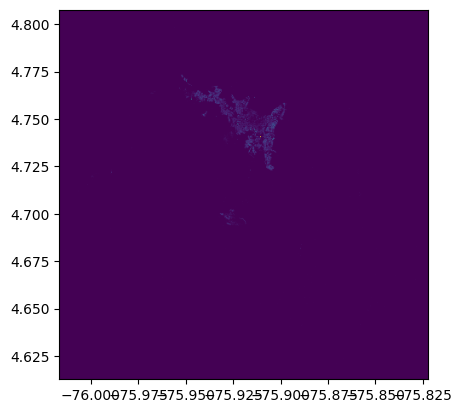

<Axes: >

In [21]:
show( pobl2018_76147 )

## Propiedades

EL método *shape* aplicado a una matriz devuelve una tupla con el tamaño de cada dimensión de la matriz:

In [22]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [23]:
a.shape

(2, 3)

In [24]:
a.dtype

dtype('float64')

La declaración *in* se puede utilizar para probar si hay valores presentes en una matriz:

In [25]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [26]:
2 in a

True

In [27]:
0 in a

False

A continuación, se encuentra la explicación de las propiedades de un ráster:

* *src.name*: Ruta del archivo ráster.
* *src.mode*: Modo de apertura del archivo (p. ej., "r" para lectura).
* *src.driver*: Controlador GDAL utilizado para abrir el archivo (p. ej., "GTiff").
* *src.width*: Número de columnas del ráster.
* *src.height*: Número de filas del ráster.
* *src.count*: Número de bandas del ráster.
* *src.dtypes*: Tupla que contiene el tipo de dato de cada banda (p. ej., "uint8", "float32").
* *src.nodatavals*: Tupla que contiene el valor "NoData" de cada banda.
* *src.crs*: Sistema de Referencia de Coordenadas del ráster.
* *src.transform*: Matriz de transformación afín que asigna las coordenadas de los píxeles a las coordenadas espaciales.
* *src.bounds*: La extensión geográfica del ráster como un objeto BoundingBox.
* *src.res*: Una tupla que representa la resolución x e y de los píxeles.
* *src.meta*: Un diccionario que contiene todos los metadatos asociados al dataset ráster.

In [28]:
print(f"File name: {pobl2018_76147.name}")
print(f"File mode: {pobl2018_76147.mode}")
print(f"Driver: {pobl2018_76147.driver}")
print(f"Width: {pobl2018_76147.width}")
print(f"Height: {pobl2018_76147.height}")
print(f"Number of bands: {pobl2018_76147.count}")
print(f"Data types of bands: {pobl2018_76147.dtypes}")
print(f"NoData values: {pobl2018_76147.nodatavals}")
print(f"Coordinate Reference System (CRS): {pobl2018_76147.crs}")
print(f"Affine transform: {pobl2018_76147.transform}")
print(f"Bounds: {pobl2018_76147.bounds}")
print(f"Resolution (x, y): {pobl2018_76147.res}")

File name: /content/Interm_Modulo_18_Pobl_CNPV2018_76147_re.tif
File mode: r
Driver: GTiff
Width: 433
Height: 433
Number of bands: 4
Data types of bands: ('float32', 'float32', 'float32', 'float32')
NoData values: (None, None, None, None)
Coordinate Reference System (CRS): EPSG:4326
Affine transform: | 0.00, 0.00,-76.02|
| 0.00,-0.00, 4.81|
| 0.00, 0.00, 1.00|
Bounds: BoundingBox(left=-76.01669698359167, bottom=4.6127591524253315, right=-75.8222117245798, top=4.807603737550855)
Resolution (x, y): (0.00044915764205976077, 0.00044998749451622224)


In [29]:
pobl2018_76147.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 433,
 'height': 433,
 'count': 4,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.00044915764205976077, 0.0, -76.01669698359167,
        0.0, -0.00044998749451622224, 4.807603737550855)}

# 1. Métodos aplicados dentro de arrays

## Indexado

La función array toma dos argumentos: la lista que se convertirá en el array y el tipo de cada miembro de la lista. Los elementos del array se acceden, segmentan y manipulan igual que las listas:

Elemento individual

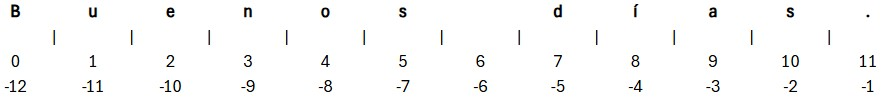

Elementos múltiples

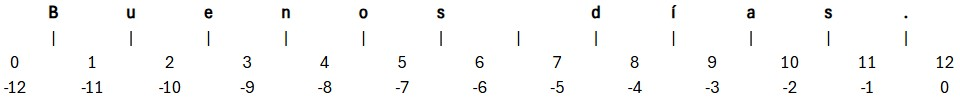

In [30]:
multiplos_de_3 = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
a = np.array(multiplos_de_3, int)

In [31]:
a[2:3]

array([6])

In [32]:
a[5]

np.int64(15)

Los arrays pueden ser multidimensionales. A diferencia de las listas, se accede a los diferentes ejes mediante comas entre corchetes. A continuación, se muestra un ejemplo con un array bidimensional (por ejemplo, una matriz):

In [33]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [34]:
a[0,0]

np.float64(1.0)

In [35]:
a[0,1]

np.float64(2.0)

La segmentación de matrices funciona con múltiples dimensiones de la misma forma que de costumbre, aplicando cada especificación de segmentación como filtro a una dimensión específica. El uso de un solo ":" en una dimensión indica el uso de todos los elementos a lo largo de esa dimensión:

In [36]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [37]:
a[1,:]

array([4., 5., 6.])

In [38]:
a[:,2]

array([3., 6.])

In [39]:
a[:,-2:]

array([[2., 3.],
       [5., 6.]])

In [40]:
a[-1:,-2:]

array([[5., 6.]])

## Redimensionar

Los arrays se pueden remodelar mediante tuplas que especifican nuevas dimensiones. En el siguiente ejemplo, convertimos un array unidimensional de diez elementos en uno bidimensional cuyo primer eje tiene cinco elementos y el segundo, dos:

Tener en cuenta que la función reshape crea un nuevo array y no modifica el array original.

In [41]:
a = np.array(range(10), float)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [42]:
b = a.reshape((5, 2))

In [43]:
b

array([[0., 1.],
       [2., 3.],
       [4., 5.],
       [6., 7.],
       [8., 9.]])

In [44]:
b.shape

(5, 2)

También se pueden generar versiones transpuestas de matrices, lo que creará una nueva matriz con los dos ejes finales intercambiados:

In [45]:
a = np.array(range(6), float).reshape((2, 3))
a

array([[0., 1., 2.],
       [3., 4., 5.]])

In [46]:
b = a.transpose()
b

array([[0., 3.],
       [1., 4.],
       [2., 5.]])

In [47]:
c = a.flatten()
c

array([0., 1., 2., 3., 4., 5.])

## Concatenación

Se pueden concatenar dos o más matrices entre sí utilizando la función *concatenate* con una tupla de las matrices que se unirán:

In [48]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

Si una matriz tiene más de una dimensión, es posible especificar el eje a lo largo del cual se concatenan varias matrices. De forma predeterminada (sin especificar el eje), numpy concatena a lo largo de la primera dimensión:

In [49]:
a = np.array([[1, 2], [3, 4]], float)
b = np.array([[5, 6], [7,8]], float)

In [50]:
np.concatenate((a,b))

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [51]:
np.concatenate((a,b), axis=0)

array([[1., 2.],
       [3., 4.],
       [5., 6.],
       [7., 8.]])

In [52]:
np.concatenate((a,b), axis=1)

array([[1., 2., 5., 6.],
       [3., 4., 7., 8.]])

La dimensionalidad de una matriz se puede aumentar utilizando la constante newaxis entre paréntesis. Notación:

In [53]:
a = np.array([1, 2, 3], float)
a

array([1., 2., 3.])

In [54]:
b = a[np.newaxis,:]
b

array([[1., 2., 3.]])

In [55]:
a.shape

(3,)

In [56]:
b.shape

(1, 3)

## Copiado



Tener en cuenta que el enfoque de vinculación de nombres de Python también se aplica a los arrays. La función copy puede usarse para crear una copia independiente de un array en memoria si es necesario:

In [57]:
a = np.array([1, 2, 3], float)
b = a
c = a.copy()
a[0] = 0

In [58]:
a

array([0., 2., 3.])

In [59]:
b

array([0., 2., 3.])

In [60]:
c

array([1., 2., 3.])

## Crear listas a partir de un array

También se pueden crear listas a partir de matrices:

In [61]:
a = np.array([1, 2, 3], float)

In [62]:
b = a.tolist()
b

[1.0, 2.0, 3.0]

In [63]:
c = list(a)
c

[np.float64(1.0), np.float64(2.0), np.float64(3.0)]

Se puede llenar una matriz con un solo valor, con el método *fill*. El método remplaza directamente los valores sin tener que crear una nueva variable.

In [64]:
a = np.array(range(10), float)
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [65]:
a.fill(0)

In [66]:
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 2. Operaciones dentro de los arrays

Numpy ofrece una amplia biblioteca de funciones matemáticas comunes que se pueden aplicar elemento por elemento a matrices. Entre ellas se encuentran las funciones: *abs, sign, sqrt, log, log10, exp, sen, cos, tan, arcsin, arccos, arctan, senh, cosh, tanh, arcsinh, arccosh* y *arctanh*.

In [67]:
a = np.array([1, 4, 9], float)
np.sqrt(a)

array([1., 2., 3.])

Las funciones *floor, ceil* y *rint* dan el entero inferior, superior o más cercano (redondeado):

In [68]:
np.floor(a)

array([1., 4., 9.])

In [69]:
np.ceil(a)

array([1., 4., 9.])

In [70]:
np.rint(a)

array([1., 4., 9.])

También se incluyen en el módulo numpy dos constantes matemáticas importantes:

In [71]:
np.pi

3.141592653589793

In [72]:
np.e

2.718281828459045

Es posible iterar sobre matrices de una manera similar a la de las listas. Para matrices multidimensionales, la iteración se realiza sobre el primer eje de modo que cada bucle devuelve una subsección de la matriz.



In [73]:
a = np.array([1, 4, 5], int)
for x in a:
  print(x)

1
4
5


In [74]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)
for x in a:
  print(x)

[1. 2.]
[3. 4.]
[5. 6.]


La asignación múltiple también se puede utilizar con la iteración de matriz:

In [75]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)
for (x, y) in a:
  print(x * y)

2.0
12.0
30.0


Los elementos de una matriz se pueden sumar o multiplicar:

In [76]:
a = np.array([2, 4, 3], float)

In [77]:
a.sum()

np.float64(9.0)

In [78]:
a.prod()

np.float64(24.0)

In [79]:
a[1:].sum()

np.float64(7.0)

En este ejemplo, se utilizaron funciones miembro de los arrays. Como alternativa, se puede acceder a las funciones independientes del módulo NumPy:

In [80]:
np.sum(a)

np.float64(9.0)

In [81]:
np.prod(a)

np.float64(24.0)

Varias rutinas permiten el cálculo de cantidades estadísticas en conjuntos de datos de matriz, como la media (promedio), la varianza y la desviación estándar:

In [82]:
a = np.array([[1, 2, 1, 3], [5, 3, 1, 8]], float)
a

array([[1., 2., 1., 3.],
       [5., 3., 1., 8.]])

In [83]:
a.mean()

np.float64(3.0)

In [84]:
a.var()

np.float64(5.25)

In [85]:
a.std()

np.float64(2.29128784747792)

In [86]:
np.median(a)

np.float64(2.5)

In [87]:
np.corrcoef(a)

array([[1.        , 0.72870505],
       [0.72870505, 1.        ]])

In [88]:
np.cov(a)

array([[0.91666667, 2.08333333],
       [2.08333333, 8.91666667]])

También es posible encontrar los valores mínimos y máximos de los elementos:

In [89]:
a = np.array([2, 1, 9], float)
a.min()

np.float64(1.0)

In [90]:
a.max()

np.float64(9.0)

In [91]:
a[2] = np.nan

In [92]:
np.min(a)

np.float64(nan)

In [93]:
np.max(a)

np.float64(nan)

In [94]:
np.nanmin(a)

np.float64(1.0)

In [95]:
np.nanmax(a)

np.float64(2.0)

Para matrices multidimensionales, cada una de las funciones descritas hasta ahora puede tomar un argumento opcional *axis* que realizará una operación únicamente a lo largo del eje especificado, colocando los resultados en una matriz de retorno:

In [96]:
a = np.array([[0, 2], [3, -1], [3, 5]], float)

In [97]:
a.mean(axis=0)

array([2., 2.])

In [98]:
a.mean(axis=1)

array([1., 1., 4.])

In [99]:
a.min(axis=1)

array([ 0., -1.,  3.])

Al igual que las listas, las matrices se pueden ordenar:

In [100]:
a = np.array([6, 2, 5, -1, 0], float)
a.sort()

In [101]:
a

array([-1.,  0.,  2.,  5.,  6.])

In [102]:
a = np.array([6, 2, 5, -1, 0], float)
a.clip(5000, 3)

array([3., 3., 3., 3., 3.])

Los valores de un array se pueden recortar para que estén dentro de un rango predefinido. Esto equivale a aplicar *min(max(x, minval), maxval)* a cada elemento *x* del array.

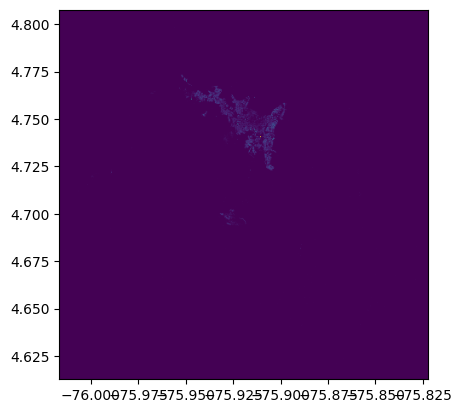

<Axes: >

In [103]:
show( pobl2018_76147 )

In [104]:
arr_po_2018.min()

np.float32(0.0)

In [105]:
arr_po_2018.max()

np.float32(547.0)

In [106]:
arr_po_2018_clip = arr_po_2018.clip(0, 1)

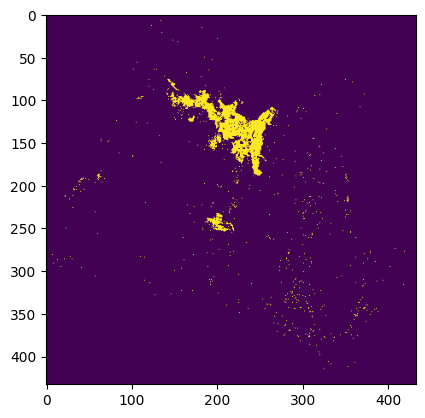

<Axes: >

In [107]:
show( arr_po_2018_clip )

In [108]:
kwargs = pobl2018_76147.meta

with rs.open( "/content/Interm_Modulo_18_Pobl_CNPV2018_76147_re_CLIP.tif" , 'w', **kwargs) as dst:
  dst.write_band(1, arr_po_2018_clip.astype(rs.int32))

In [109]:
pobl2018_76147_clip = rs.open('/content/Interm_Modulo_18_Pobl_CNPV2018_76147_re_CLIP.tif')

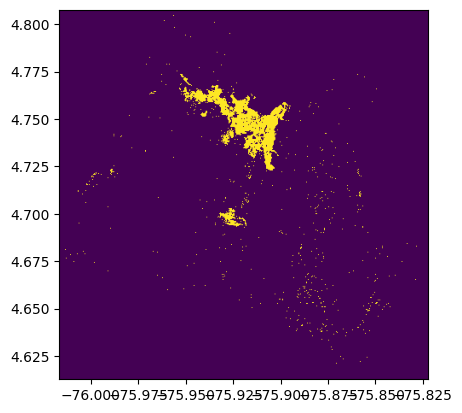

<Axes: >

In [110]:
show( pobl2018_76147_clip )

Se pueden extraer elementos únicos de una matriz:

In [111]:
a = np.array([1, 1, 4, 5, 5, 5, 7], float)
np.unique(a)

array([1., 4., 5., 7.])

Varias funciones permiten comprobar los valores de un array. La función *nonzero* proporciona una tupla de índices de los valores distintos de cero del array. El número de elementos de la tupla es igual al número de ejes del array.
También es posible comprobar si los valores son NaN («no un número») o finitos.
Aunque aquí usamos constantes de numpy para sumar los valores *nan* e infinitos, estos pueden resultar de operaciones matemáticas estándar.

In [112]:
a = np.array([0, np.nan, np.inf], float)

In [113]:
a.nonzero()

(array([1, 2]),)

In [114]:
np.isnan(a)

array([False,  True, False])

In [115]:
np.isfinite(a)

array([ True, False, False])

La función *where* crea una nueva matriz a partir de dos matrices de tamaño equivalente mediante un filtro booleano para seleccionar entre los elementos de ambas. Su sintaxis básica es *where(boolarray, truearray, falsearray)*:

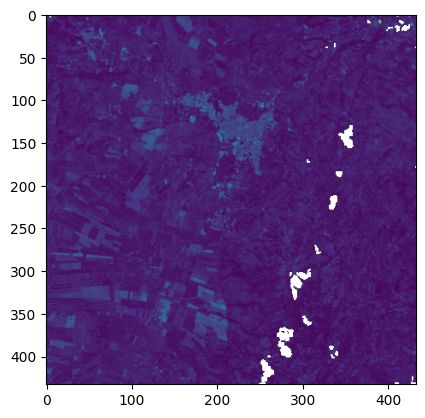

<Axes: >

In [116]:
show( sentinel_2018.read()[0] )

In [117]:
nan_a_cero = np.where(np.isnan(sentinel_2018.read()[0]), 0, sentinel_2018.read()[0])

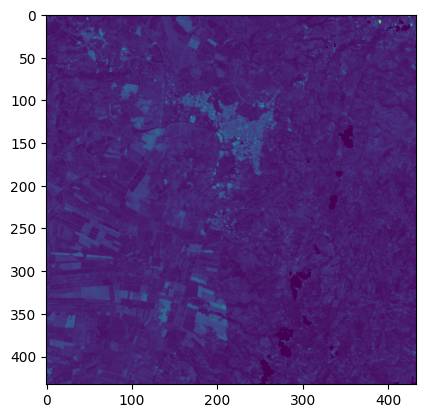

<Axes: >

In [118]:
show( nan_a_cero  )

In [119]:
a = np.array([[6, 4], [5, 9]], float)

In [120]:
a >= 6

array([[ True, False],
       [False,  True]])

In [121]:
a[a >= 6]

array([6., 9.])

# 3. Operaciones entre arrays

Cuando se utilizan operaciones matemáticas estándar con matrices, estas se aplican elemento por elemento. Esto significa que las matrices deben tener el mismo tamaño durante la suma, la resta, etc.:

In [122]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
z = np.zeros_like(a)

In [123]:
a + b

array([6., 4., 9.])

In [124]:
a - b

array([-4.,  0., -3.])

In [125]:
a * b

array([ 5.,  4., 18.])

In [126]:
b / a

array([5., 1., 2.])

In [127]:
a / z

/tmp/ipython-input-3998723906.py:1: RuntimeWarning: divide by zero encountered in divide
  a / z


array([inf, inf, inf])

In [128]:
b // a

array([5., 1., 2.])

In [129]:
a // z

/tmp/ipython-input-4176328400.py:1: RuntimeWarning: divide by zero encountered in floor_divide
  a // z


array([inf, inf, inf])

In [130]:
a % b

array([1., 0., 3.])

In [131]:
a % z

/tmp/ipython-input-1671942276.py:1: RuntimeWarning: invalid value encountered in remainder
  a % z


array([nan, nan, nan])

In [132]:
b**a

array([  5.,   4., 216.])

Para matrices bidimensionales, la multiplicación se mantiene elemento por elemento y no corresponde a la multiplicación de matrices.

In [133]:
a = np.array([[1,2], [3,4]], float)
b = np.array([[2,0], [1,3]], float)
a * b

array([[ 2.,  0.],
       [ 3., 12.]])

Se producen errores si las matrices no coinciden en tamaño:

In [134]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)
#a + b

Las comparaciones booleanas permiten comparar elementos por elemento en matrices de igual tamaño. El valor de retorno es una matriz de valores booleanos verdaderos o falsos:

In [135]:
a = np.array([1, 3, 0], float)
b = np.array([0, 3, 2], float)
a > b

array([ True, False, False])

In [136]:
a == b

array([False,  True, False])

In [137]:
a <= b

array([False,  True,  True])

In [138]:
c = a > b
c

array([ True, False, False])

In [139]:
a = np.array([1, 3, 0], float)
a > 2

array([False,  True, False])

Los operadores *any* y *all* se pueden usar para determinar si alguno o todos los elementos de una matriz booleana son verdaderos:

In [140]:
a = np.array([1, 3, 0], float)

In [141]:
any(a > 2)

True

In [142]:
all(a > 2)

False

In [143]:
np.logical_and(a > 0, a < 3)

array([ True, False, False])

In [144]:
b = np.array([True, False, True], bool)
c = np.array([False, True, False], bool)

In [145]:
np.logical_not(b)

array([False,  True, False])

In [146]:
np.logical_or(b, c)

array([ True,  True,  True])

En SQL, unimos tablas según una clave, mientras que en NumPy unimos matrices mediante ejes.

Pasamos una secuencia de matrices que queremos unir a la función *concatenate*, junto con el eje. Si no se pasa explícitamente el eje, se toma como cero.

In [147]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.concatenate((a, b))
c

array([1, 2, 3, 4, 5, 6])

In [148]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
c = np.concatenate((a, b), axis=1)
c

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [149]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.stack((a, b), axis=1)
c

array([[1, 4],
       [2, 5],
       [3, 6]])

In [150]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.hstack((a, b))
c

array([1, 2, 3, 4, 5, 6])

In [151]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.vstack((a, b))
c

array([[1, 2, 3],
       [4, 5, 6]])